<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

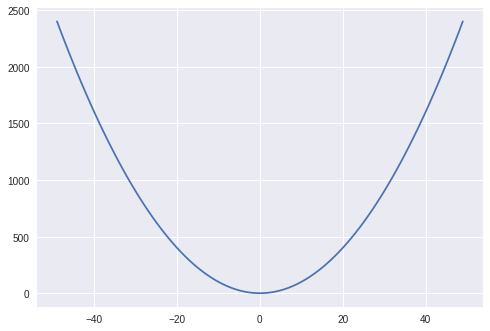

In [1]:
# Passes a vertical line test

import matplotlib.pyplot as plt

x_cords = range(-49,50)
y_cords = [x*x for x in x_cords]

plt.plot(x_cords, y_cords)
plt.show()

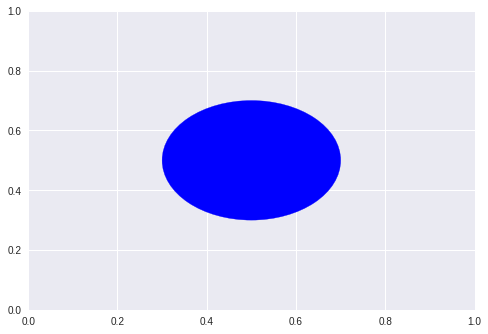

In [2]:
# Does not pass the vertical line test

circle = plt.Circle((0.5, 0.5), 0.2, color='blue')
fig, ax = plt.subplots()
ax.add_artist(circle)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"



> Because there are two inputs mapped to the same output. A function only has one output values for each input value.



# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
# each x value must only correspond to one output y value

# Relation 2 is the only relation that is a function because all the x values are unique

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Domains are separated by commas in notation

m domain dimensionality is 3
m codomain dimensionality is 3

n domain dimensionality is 4, codomain is 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Kernel methods use kernel functions that enable them to operate in a higher dimensional and implicit feature space. They do this by computing the inner products between all pairs of data in that feature space.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

Answer:

T1 = \begin{bmatrix} 1 \ 3\\ -1 \ 2 \\  \end{bmatrix}

T2 = \begin{bmatrix} 4 \ 1 \ 2\\ -1 \ 2 \ 3 \\ 5\ 1 \ -2  \end{bmatrix}

Where unit vectors are:

$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector is the direction, eigenvalues is a number that tells you how much variance there is in the data in the 2 direction of the eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

1. It's hard to understand the structure of the data.
2. Learning from large datasets has constraints on memory and processing power.
3. The variance of data increases with its dimensions so it can be difficult to detect similar instances in high dimensional spaces.
4. This sparsity is also problematic for statistical significance. The statistically signiifcant data requirements increase exponentially for highly dimensional features.


## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have 5 times as many observations as you do parameters in your modell.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [8]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# The features

features = df.columns.values[0:4]

x = df.loc[:, features].values

# The target

y = df.columns.values[-1]

# Standardizing the features

x = StandardScaler().fit_transform(x)

# Let's project the 4 dimensional data onto 2 dimensions
# via PCA

from sklearn.decomposition import PCA

pca = PCA(2)
components = pca.fit_transform(x)

df_c = pd.DataFrame(data = components, 
                    columns = ['principal component 1', 'principal component 2'])

new_df = pd.concat([df_c, df[['species']]], axis = 1)

new_df.sample(10)

,principal component 1,principal component 2,species
138,0.923433,0.019230,virginica
135,2.800949,0.844748,virginica
92,0.330005,-0.988901,versicolor
111,1.599065,-0.428249,virginica
26,-2.052063,0.266014,setosa
61,0.438730,-0.058881,versicolor
131,2.316082,2.626184,virginica
107,2.303006,0.409517,virginica
103,1.438685,-0.050011,virginica
91,0.623171,0.027543,versicolor


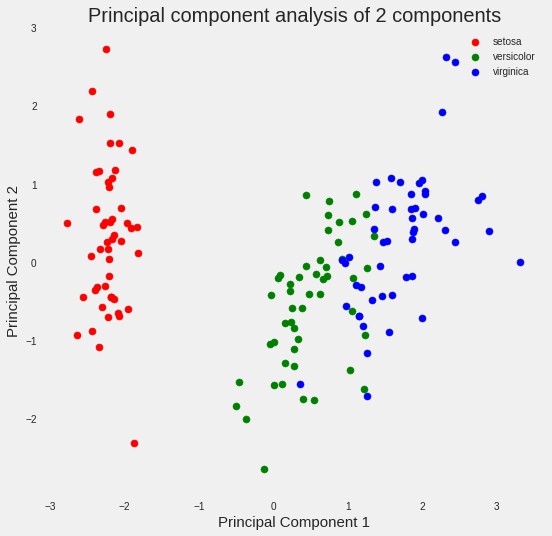

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal component analysis of 2 components', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['species'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'principal component 1'], 
               new_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)